## Интеллектуальный анализ данных – весна 2023
## Домашнее задание 4: kNN. Линейные модели. Работа с признаками

Правила:

* Домашнее задание оценивается в 10 баллов.

* Можно использовать без доказательства любые результаты, встречавшиеся на лекциях или семинарах по курсу, если получение этих результатов не является вопросом задания.

* Можно использовать любые свободные источники с *обязательным* указанием ссылки на них.

* Плагиат не допускается. При обнаружении случаев списывания, 0 за работу выставляется всем участникам нарушения, даже если можно установить, кто у кого списал.

* Старайтесь сделать код как можно более оптимальным. В частности, будет штрафоваться использование циклов в тех случаях, когда операцию можно совершить при помощи инструментов библиотек, о которых рассказывалось в курсе.  

### Задание 1:  Визуализация решающих поверхностей в kNN.

В этом задании мы изобразим решающую поверхность для классификатора kNN, чтобы наглядно увидеть, как классификатор принимает решения для новых объектов. Для простоты будем работать со встроенным в `sklearn` набором данных `wine`, содержащим информацию о характеристиках трёх видов вина. Описание набора можно найти [здесь](https://scikit-learn.org/stable/modules/generated/sklearn.datasets.load_wine.html#sklearn.datasets.load_wine) и [здесь](https://rdrr.io/cran/rattle.data/man/wine.html).

Загрузим набор данных и сохраним информацию о признаках в переменную `X`, а о зависимой переменной – в переменную `y`.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
from sklearn.datasets import load_wine

data = load_wine()
X = pd.DataFrame(data['data'], columns = data['feature_names'])
y = data['target']
X.head(8)

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline
0,14.23,1.71,2.43,15.6,127.0,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065.0
1,13.20,1.78,2.14,11.2,100.0,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050.0
2,13.16,2.36,2.67,18.6,101.0,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185.0
3,14.37,1.95,2.50,16.8,113.0,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480.0
4,13.24,2.59,2.87,21.0,118.0,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735.0
5,14.20,1.76,2.45,15.2,112.0,3.27,3.39,0.34,1.97,6.75,1.05,2.85,1450.0
6,14.39,1.87,2.45,14.6,96.0,2.50,2.52,0.30,1.98,5.25,1.02,3.58,1290.0
7,14.06,2.15,2.61,17.6,121.0,2.60,2.51,0.31,1.25,5.05,1.06,3.58,1295.0


**Задача 1.1 (0.5 балла)** Есть ли в наборе данных пропущенные значения? Если да, то удалите их. Есть ли в наборе данных категориальные переменные? Если да, то закодируйте их при помощи OneHot-кодирования.

In [3]:
X.isna().sum() #пропущенных значений нет

alcohol                         0
malic_acid                      0
ash                             0
alcalinity_of_ash               0
magnesium                       0
total_phenols                   0
flavanoids                      0
nonflavanoid_phenols            0
proanthocyanins                 0
color_intensity                 0
hue                             0
od280/od315_of_diluted_wines    0
proline                         0
dtype: int64

In [4]:
assert X.shape[0] == len(y) # в таргете тоже нет пропущенных

In [5]:
X.dtypes #все данные числовые -> кодирование не требуется

alcohol                         float64
malic_acid                      float64
ash                             float64
alcalinity_of_ash               float64
magnesium                       float64
total_phenols                   float64
flavanoids                      float64
nonflavanoid_phenols            float64
proanthocyanins                 float64
color_intensity                 float64
hue                             float64
od280/od315_of_diluted_wines    float64
proline                         float64
dtype: object

**Задача 1.2 (0.5 балла)** Используя функцию `train_test_split()`, разделите выборку на тренировочную и тестовую, и долю тестовой выборки задайте равной 0.3. Так как разбиение осуществляется случайным образом, не забудьте зафиксировать `np.random.seed()` для воспроизводимости результатов.

In [6]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 17)

**Задача 1.3 (1 балл)** На тренировочной выборке обучите шесть классификаторов kNN, отличающихся только числом соседей. Для первого классификатора число соседей поставьте равным 1, для второго - 3, для третьего – 5, для четвертого – 10, для пятого – 15 и для шестого – 25 (обратите внимание на параметр `n_neighbours` класса `KNeighborsClassifier`). Для обучения используйте только два признака: `alcohol` и `magnesium` – и евклидово расстояние. Не забудьте масштабировать признаки, например, при помощи модуля `StandardScaler`.

Выведите долю правильных ответов на тренировочной и тестовой выборках для каждого классификатора.

In [7]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score

In [8]:
neighbors_list = [1,3,5,10,15,25] #составляем список из всех нужных соседей

scl = StandardScaler()

 # масштабируем признаки используя стандартную нормировку только для двух признаков
X_train_alc_magn_scaled = pd.DataFrame(
    data = scl.fit_transform(X_train[["alcohol", "magnesium"]]), columns = X_train[["alcohol", "magnesium"]].columns
)

In [9]:
knn_list = []
for k in neighbors_list:

  knn = KNeighborsClassifier(n_neighbors = k).fit(X_train_alc_magn_scaled, y_train)
  knn_list.append(knn)

  accuracy_train = accuracy_score(y_train, knn.predict(X_train_alc_magn_scaled))
  accuracy_test = accuracy_score(y_test, knn.predict(X_test[["alcohol", "magnesium"]]))
  print(f"NN = {k}, train: {accuracy_train:.2f}, test: {accuracy_test:.2f}")

NN = 1, train: 0.99, test: 0.43
NN = 3, train: 0.78, test: 0.43
NN = 5, train: 0.79, test: 0.43
NN = 10, train: 0.76, test: 0.20
NN = 15, train: 0.77, test: 0.20
NN = 25, train: 0.76, test: 0.20


**Задача 1.4 (0 баллов)** Установите библиотеку `mlxtend` командой ниже. Библиотеку также можно установить из терминала при помощи `pip` или `conda`, как указано [здесь](http://rasbt.github.io/mlxtend/installation/).

In [10]:
!pip install mlxtend

Если всё прошло успешно, то в выводе команды выше вы увидите сообщение вроде "successfully installed", а следующая ячейка выполнится без ошибок.

In [11]:
import mlxtend

**Задача 1.5 (1 балл)** Библиотека `mlxtend` позволяет достаточно просто визуализировать решающие поверхности обученных классификаторов. Изучите [документацию](http://rasbt.github.io/mlxtend/user_guide/plotting/plot_decision_regions/) библиотеки и найдите, как можно построить несколько графиков решающих поверхностей на сетке (decision regions grid). Постройте такую сетку графиков для обученных выше классификаторов.

**Подсказки:**
1. Вы можете использовать готовый код, приведённый в документации, и адаптировать его для нашего случая.
2. Вам могут понадобиться дополнительные библиотеки, которые используются в примере из документации.
3. Обратите внимание на то, как нужно изменить параметры `gridspec.GridSpec()` и `itertools.product()` для нашего числа классификаторов.
4. В функции `plot_decision_region()` используйте `y_train` и нужные столбцы из `X_train`. Возможно, их придётся перевести в формат массива `numpy`.
5. Если в задаче 1.3 вы сохраните обученные классификаторы в список, то не будет необходимости обучать их заново.
6. Построение графика может занять некоторое время – придётся немного подождать!

In [12]:
import matplotlib.pyplot as plt
from mlxtend.plotting import plot_decision_regions
import matplotlib.gridspec as gridspec
import itertools
import warnings


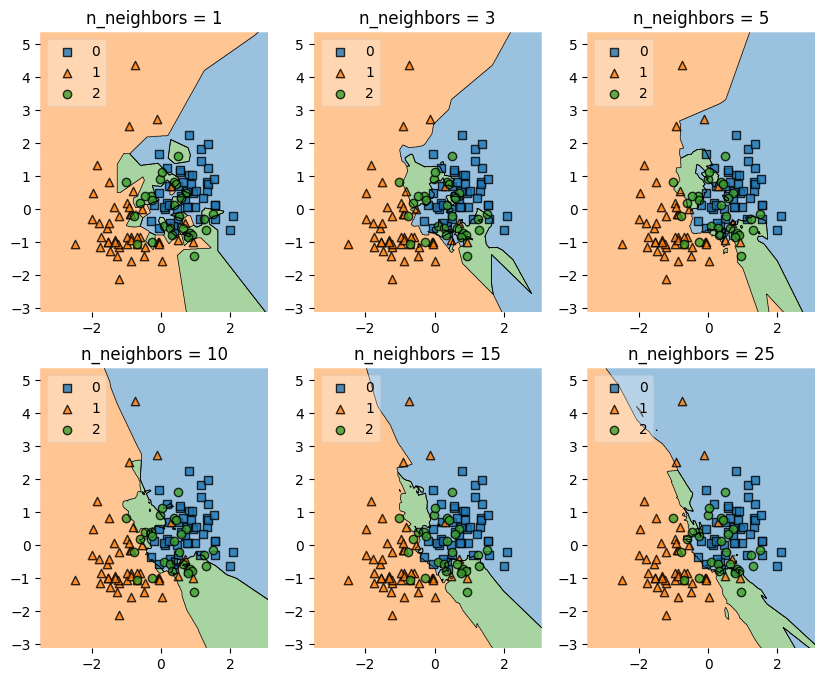

In [13]:
warnings.filterwarnings('ignore')

gs = gridspec.GridSpec(2, 3)

fig = plt.figure(figsize=(10,8))

labels = [f"n_neighbors = {k}" for k in neighbors_list]
for knn, lab, grd in zip(knn_list,
                         labels,
                         itertools.product([0,1], [0, 1, 2])):

    ax = plt.subplot(gs[grd[0], grd[1]])
    fig = plot_decision_regions(X=np.array(X_train_alc_magn_scaled), y=y_train, clf=knn, legend=2)
    plt.title(lab)

plt.show()

**Задача 1.6 (0.5 балла)** Прокомментируйте результаты, полученные в задачах 1.3 и 1.5. Какое число соседей оптимально использовать для обучения классификатора? Поясните ваш выбор при помощи описания геометрии данных и получаемой решающей поверхности.

**Ответ:** Оптимальное число соседей - 5. Во-первых один из лучших accuracy, а во-вторых, о картинке более сглаженные грани областей

### Задание 2. KNN своими руками. 2 Балла

В данном задании мы попробуем реализовать алгоритм KNN своими руками. В данном случае мы попробуем сделать KNN для классификации.

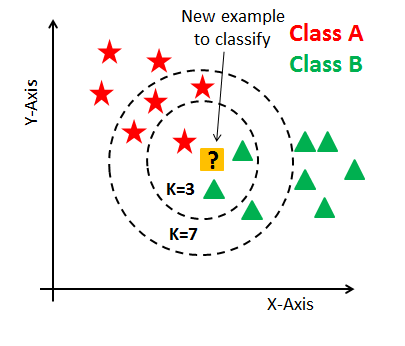

In [14]:
import numpy as np
from collections import Counter

class KNN:
    def __init__(self, k:int):
      self.k = k

    def fit(self, X, y):
      self.X_train = X
      self.y_train = y

    def predict(self, X):
      self.X_test = X

      #создаем матрицу размера (len(X_train) * len(X_test)), в которой элемент (i, j) - Евклидово расстояние между i-тым объектом X_train и j-тым объектом X_test
      distances = np.sum((self.X_train[:,np.newaxis] - self.X_test) ** 2, axis=2) ** 0.5

      #выберем первые k индексов элементов для которых расстояния минимальны и узнаем для них классы из y_train
      k_nearest_classes = self.y_train[np.argsort(distances, axis=0)[:self.k]]

      #посчитаем для каждого столбца из k_nearest_classes (объекта из X_test) самый популярный класс
      return np.apply_along_axis(lambda x: np.bincount(x).argmax(), axis = 0, arr = k_nearest_classes)



In [15]:
# Не меняйте файл!
def test_knn(KNN):
  knn = KNN(k=1)
  X_train =  np.array([[1, 1], [2, 2]])
  y_train =  np.array([0, 1])
  X_test =  np.array([[1.5, 1.5]])
  knn.fit(X_train, y_train)
  assert knn.predict(X_test) == [0]

  knn = KNN(k=3)
  X_train = np.array([[1, 1], [2, 2], [3, 3], [4, 4], [5, 5], [6, 6], [7, 7], [8, 8], [9, 9], [10, 10]])
  y_train = np.array([0, 0, 0, 0, 1, 1, 1, 1, 1, 1])
  X_test = np.array([[9.5, 9.5]])
  knn.fit(X_train, y_train)
  assert knn.predict(X_test) == [1]

  knn = KNN(k=3)
  X_train = np.array([[1, 1], [2, 2], [3, 3], [4, 4], [5, 5], [6, 6], [7, 7], [8, 8], [9, 9], [10, 10]])
  y_train = np.array([0, 0, 0, 0, 1, 1, 1, 1, 1, 1])
  X_test = np.array([[5.5, 5.5]])
  knn.fit(X_train, y_train)
  assert knn.predict(X_test) == [1]

  knn = KNN(k=3)
  X_train = np.array([[1, 1], [2, 2], [3, 3], [4, 4], [5, 5], [6, 6], [7, 7], [8, 8], [9, 9], [10, 10]])
  y_train = np.array([0, 0, 0, 0, 1, 1, 1, 1, 1, 1])
  X_test = np.array([[15, 15]])
  knn.fit(X_train, y_train)
  assert knn.predict(X_test) == [1]

  knn = KNN(k=3)
  X_train = np.array([[1, 1], [2, 2], [3, 3], [4, 4], [5, 5], [6, 6], [7, 7], [8, 8], [9, 9], [10, 10]])
  y_train = np.array([0, 0, 0, 0, 1, 1, 1, 1, 1, 1])
  X_test = np.array([[5, 5], [2, 2]])
  knn.fit(X_train, y_train)
  assert all(knn.predict(X_test) == [1, 0])

In [16]:
# Если тесты эти пройдены, то все верно!
test_knn(KNN)

### Задание 3: Линейная регрессия.

В этом задании мы рассмотрим различные аспекты построения линейной модели. Мы будем работать с одним из классических наборов данных в статистике, содержащим информацию о бриллиантах. Описание можно посмотреть [здесь](https://www.kaggle.com/shivam2503/diamonds).

In [17]:
data = pd.read_csv('https://raw.githubusercontent.com/maminasladost/datasets_for_study/main/diamonds.csv')
data.head(5)

,Unnamed: 0,carat,cut,color,clarity,depth,table,price,x,y,z
0,1,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
1,2,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
2,3,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
3,4,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
4,5,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75


Мы будем решать задачу предсказания цены бриллианта `price` в зависимости от его характеристик.

**Задача 3.1 (0.1 балла)** Есть ли в наборе данных пропущенные значения? Если да, удалите их.

In [18]:
data.isna().sum() #пропусков нет

Unnamed: 0    0
carat         0
cut           0
color         0
clarity       0
depth         0
table         0
price         0
x             0
y             0
z             0
dtype: int64

**Задача 3.2 (0.1 балла)** Есть ли в наборе данных бессмысленные столбцы (признаки, не несущие дополнительной информации)? Если да, то удалите их.

In [19]:
data.drop(columns = ["Unnamed: 0"], inplace = True)
data

,carat,cut,color,clarity,depth,table,price,x,y,z
0,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
1,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
2,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
3,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
4,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75
...,...,...,...,...,...,...,...,...,...,...
53935,0.72,Ideal,D,SI1,60.8,57.0,2757,5.75,5.76,3.50
53936,0.72,Good,D,SI1,63.1,55.0,2757,5.69,5.75,3.61
53937,0.70,Very Good,D,SI1,62.8,60.0,2757,5.66,5.68,3.56
53938,0.86,Premium,H,SI2,61.0,58.0,2757,6.15,6.12,3.74


**Задача 3.3 (0.1 балла)** Линейная регрессия основана на предположении о линейной связи между признаками и целевой переменной, а потому перед выбором переменных для включения в модель имеет смысл проверить, насколько эта связь выполняется. Для следующих пунктов нам также потребуются выборочные корреляции между признаками. Выведите матрицу выборочных корреляций между всеми вещественными признаками и целевой переменной (то есть в этой матрице будет $k+1$ строка, где $k$ – количество вещественных признаков).

Какие вещественные признаки коррелируют с целевой переменной больше всего?

In [20]:
data.corr()["price"] #больше всего целевая переменная коррелирует с признаками carat, x, y, z

carat    0.921591
depth   -0.010647
table    0.127134
price    1.000000
x        0.884435
y        0.865421
z        0.861249
Name: price, dtype: float64

**Задача 3.4 (0.1 балла)** Так как линейная модель складывает значения признаков с некоторыми весами, нам нужно аккуратно обработать категориальные признаки. Закодируйте категориальные переменные при помощи OneHot-кодирования.

In [21]:
data = pd.get_dummies(data)

In [22]:
data.head()

,carat,depth,table,price,x,y,z,cut_Fair,cut_Good,cut_Ideal,...,color_I,color_J,clarity_I1,clarity_IF,clarity_SI1,clarity_SI2,clarity_VS1,clarity_VS2,clarity_VVS1,clarity_VVS2
0,0.23,61.5,55.0,326,3.95,3.98,2.43,0,0,1,...,0,0,0,0,0,1,0,0,0,0
1,0.21,59.8,61.0,326,3.89,3.84,2.31,0,0,0,...,0,0,0,0,1,0,0,0,0,0
2,0.23,56.9,65.0,327,4.05,4.07,2.31,0,1,0,...,0,0,0,0,0,0,1,0,0,0
3,0.29,62.4,58.0,334,4.20,4.23,2.63,0,0,0,...,1,0,0,0,0,0,0,1,0,0
4,0.31,63.3,58.0,335,4.34,4.35,2.75,0,1,0,...,0,1,0,0,0,1,0,0,0,0


**Задача 3.5 (0.2 балла)** Разделите выборку на тренировочную и тестовую. Долю тестовой выборки укажите равной 0.3.

In [23]:
from sklearn.model_selection import train_test_split

In [24]:
X = data.drop("price", axis=1)
y = np.array(data["price"])

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)

**Задача 3.6 (0.3 балла)** Зачастую при использовании линейных моделей вещественные признаки масштабируются. При этом оценки коэффициентов теряют прямую статистическую интерпретацию ("при увеличении $X_1$ на 1, $y$ увеличивается на $w_1$"), но приобретают свойства, полезные в задачах машинного обучения. В этой задаче масштабируйте вещественные признаки тренировочной и тестовой выборок при помощи модуля `StandardScaler`.

In [25]:
from sklearn.preprocessing import StandardScaler

In [26]:
scl = StandardScaler()
X_train_scaled = pd.DataFrame(
    data=scl.fit_transform(X_train), columns = data.drop(["price"], axis=1).columns
)

X_test_scaled = pd.DataFrame(
    data=scl.transform(X_test), columns = data.drop(["price"], axis=1).columns
)
X_test_scaled

,carat,depth,table,x,y,z,cut_Fair,cut_Good,cut_Ideal,cut_Premium,...,color_I,color_J,clarity_I1,clarity_IF,clarity_SI1,clarity_SI2,clarity_VS1,clarity_VS2,clarity_VVS1,clarity_VVS2
0,2.585329,1.011520,1.146391,1.958661,1.848431,2.047643,-0.174680,-0.317718,-0.814102,-0.587321,...,-0.334568,4.217235,-0.119545,-0.182961,-0.564362,-0.450961,-0.424190,-0.546481,-0.267875,3.112918
1,-0.924991,-0.594260,1.594871,-1.026456,-0.974930,-1.041656,-0.174680,-0.317718,-0.814102,-0.587321,...,2.988930,-0.237122,-0.119545,-0.182961,-0.564362,-0.450961,2.357432,-0.546481,-0.267875,-0.321242
2,0.924758,0.662438,0.249430,0.936969,0.967750,1.036600,-0.174680,-0.317718,1.228347,-0.587321,...,-0.334568,-0.237122,-0.119545,-0.182961,-0.564362,-0.450961,-0.424190,1.829890,-0.267875,-0.321242
3,0.441301,0.802071,-0.199050,0.617135,0.561945,0.685543,-0.174680,-0.317718,1.228347,-0.587321,...,-0.334568,-0.237122,-0.119545,-0.182961,-0.564362,-0.450961,2.357432,-0.546481,-0.267875,-0.321242
4,-0.021136,-1.432058,0.249430,0.235111,0.285653,0.081726,-0.174680,-0.317718,-0.814102,-0.587321,...,-0.334568,-0.237122,-0.119545,-0.182961,-0.564362,2.217488,-0.424190,-0.546481,-0.267875,-0.321242
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16177,0.441301,2.198401,-0.647530,0.492755,0.397897,0.741712,5.724754,-0.317718,-0.814102,-0.587321,...,2.988930,-0.237122,-0.119545,-0.182961,-0.564362,-0.450961,2.357432,-0.546481,-0.267875,-0.321242
16178,-0.988051,-0.105544,-0.647530,-1.133067,-1.130345,-1.125909,-0.174680,-0.317718,1.228347,-0.587321,...,-0.334568,-0.237122,-0.119545,-0.182961,-0.564362,-0.450961,2.357432,-0.546481,-0.267875,-0.321242
16179,-1.009071,-0.035727,0.249430,-1.213026,-1.147613,-1.168036,-0.174680,-0.317718,-0.814102,-0.587321,...,-0.334568,-0.237122,-0.119545,-0.182961,-0.564362,-0.450961,2.357432,-0.546481,-0.267875,-0.321242
16180,-0.798872,0.452988,-1.096010,-0.839886,-0.793613,-0.760810,-0.174680,-0.317718,-0.814102,-0.587321,...,-0.334568,-0.237122,-0.119545,-0.182961,-0.564362,-0.450961,-0.424190,-0.546481,3.733084,-0.321242


**Задача 3.7 (0.2 балла)** Оцените линейную регрессию на тренировочной выборке. Выведите среднеквадратичную ошибку на тренировочной и тестовой выборках.

In [27]:
from sklearn.metrics import mean_squared_error
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score

In [28]:
lr = LinearRegression()
lr.fit(X_train_scaled, y_train)
print('train')
print(f'MSE: {mean_squared_error(y_train, lr.predict(X_train_scaled))}\n')
print("test")
print(f'MSE: {mean_squared_error(y_test, lr.predict(X_test_scaled))}')

train
MSE: 1260550.4974587031

test
MSE: 1315249.482453691


In [29]:
r2_score(y_test, lr.predict(X_test_scaled))

0.9156394905545548

**Задача 3.8 (0.2 балла)** Изучите документацию модуля `LinearRegression` и выведите полученные оценки коэффициентов. Назовите вещественные переменные, оценки коэффициентов которых по модулю на порядок превышают оценки прочих вещественных переменных.

In [30]:
from matplotlib import pyplot as plt

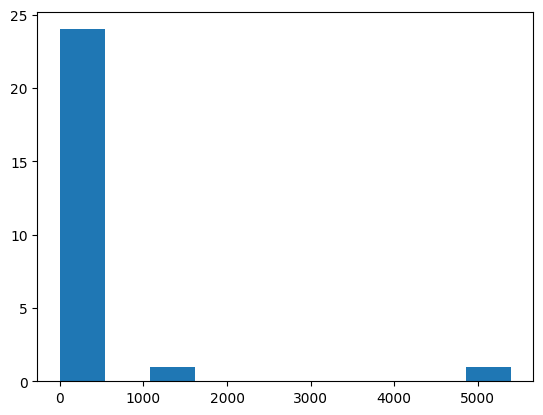

In [31]:
coef = abs(lr.coef_)
plt.hist(coef);

In [32]:
print('Переменные, оценки коэффициентов которых по модулю на порядок превышают оценки прочих переменных\n',
      list(X.columns[coef > coef.mean()]))

Переменные, оценки коэффициентов которых по модулю на порядок превышают оценки прочих переменных
 ['carat', 'x', 'clarity_I1', 'clarity_SI2']


**Задача 3.9 (0.4 балла)** Как можно заметить из анализа корреляционной матрицы в задаче 3.3, между некоторыми признаками имеется сильная корреляция, что может быть индикатором проблемы *мультиколлинеарности*. Различия в порядке коэффициентов, выявленные в предыдущей задаче также намекают на её присутствие. Как известно, для решения этой проблемы можно либо исключить некоторые признаки из модели, либо использовать регуляризацию. Мы воспользуемся вторым вариантом.

Вспомним, что смысл регуляризации заключается в том, чтобы изменить функцию потерь так, чтобы устранить проблемы, появляющиеся из-за мультиколлинеарности. При L1-регуляризации предлагается минимизировать следующую функцию потерь:

$$
\|y - X\hat{w}\|^2 + \alpha\sum_{i=1}^k|w_i|
$$

Такая модель называется Lasso-регрессией.

При L2-регуляризации предлагается минимизировать следующую функцию потерь:

$$
\|y - X\hat{w}\|^2 + \frac{1}{2}\alpha\|w\|^2
$$

Такая модель называется Ridge-регрессией.

Обучите Lasso-регрессию и Ridge-регрессию, уставновив гиперпараметр регуляризации равным 10. Для этого используйте модули `Lasso` и `Ridge` из `sklearn`. Сильно ли уменьшились веса? Сделайте вывод о том, насколько сильно проблема мультиколлинеарности проявлялась в изначальной регрессии.

In [33]:
from sklearn.linear_model import Lasso
from sklearn.linear_model import Ridge


In [34]:
lasso = Lasso(10)
lasso.fit(X_train_scaled, y_train)
coef_lasso = lasso.coef_
coef_lasso

array([4926.5880567 ,  -62.27563804,  -53.57071574, -706.80860174,
         -0.        ,  -38.87425075, -124.82492403,  -42.19717413,
         40.49635184,    0.        ,   -0.        ,  145.36887744,
         90.36887837,   62.45090091,   -0.        , -172.36511667,
       -281.18080241, -411.65214421, -478.55542935,  180.2048556 ,
       -260.32043689, -580.01133762,  103.37800552,   -0.        ,
        184.52953704,  189.95870261])

In [35]:
print("Train")
print(f"MSE: {mean_squared_error(y_train, lasso.predict(X_train_scaled))}")
print("Test")
print(f"MSE: {mean_squared_error(y_test, lasso.predict(X_test_scaled))}")

Train
MSE: 1271976.064427623
Test
MSE: 1320346.9011353399


In [36]:
r2_score(y_test, lasso.predict(X_test_scaled))

0.9153125405404492

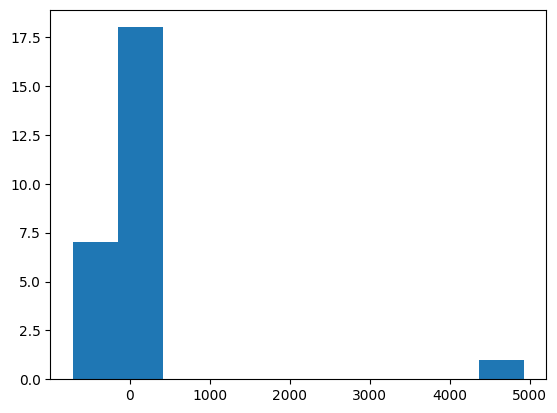

In [37]:
plt.hist(coef_lasso);

In [38]:
ridge = Ridge(10)
ridge.fit(X_train_scaled, y_train)
coef_ridge = ridge.coef_
coef_ridge

array([ 5.35767779e+03, -9.36153128e+01, -6.85774520e+01, -1.13330213e+03,
        7.48763122e+00, -3.10526974e+01, -1.22916667e+02, -4.04730016e+01,
        5.00171563e+01,  1.82776747e+01,  1.07664703e-01,  2.11539855e+02,
        1.63889551e+02,  1.35580671e+02,  6.02811760e+01, -1.26660876e+02,
       -2.49667463e+02, -3.93432086e+02, -4.59582793e+02,  2.32214393e+02,
       -1.50578736e+02, -4.92944085e+02,  2.08054489e+02,  1.07013924e+02,
        2.53466777e+02,  2.71503959e+02])

In [39]:
print("Train")
print(f"MSE: {mean_squared_error(y_train, ridge.predict(X_train_scaled))}")
print("Test")
print(f"MSE: {mean_squared_error(y_test, ridge.predict(X_test_scaled))}")

Train
MSE: 1260618.8836692611
Test
MSE: 1314837.873817252


In [40]:
r2_score(y_test, ridge.predict(X_test_scaled))

0.9156658912600677

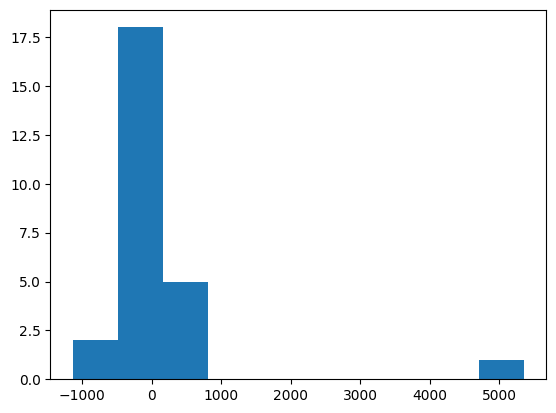

In [41]:
plt.hist(coef_ridge);

**Задача 3.10 (0.4 балла)** Как обсуждалось на семинарах, Lasso-регрессию можно использовать для отбора наиболее информативных признаков. Для следующих значений параметра регуляриазции $\alpha$: 0.1, 1, 10, 100, 200 –  обучите Lasso- и Ridge-регрессии и постройте график измненения евклидовой нормы весов (`np.linalg.norm()` от вектора оценок коэффициентов) в зависимости от параметра $\alpha$. Как известно, норма является численной характеристикой величины вектора, а потому по норме можно судить о том, насколько большие элементы содержит вектор оценок коэффициентов.

Какой метод агрессивнее уменьшает веса? Поясните, почему Lasso-регрессию часто используют для отбора признаков.

In [42]:
alpha_list = [0.1, 1, 10, 100, 200]
lasso_weights = []
ridge_weights = []

for alpha in alpha_list:
  lasso = Lasso(alpha=alpha).fit(X_train_scaled, y_train)
  ridge = Ridge(alpha=alpha).fit(X_train_scaled, y_train)

  lasso_weights.append(np.linalg.norm(lasso.coef_))
  ridge_weights.append(np.linalg.norm(ridge.coef_))


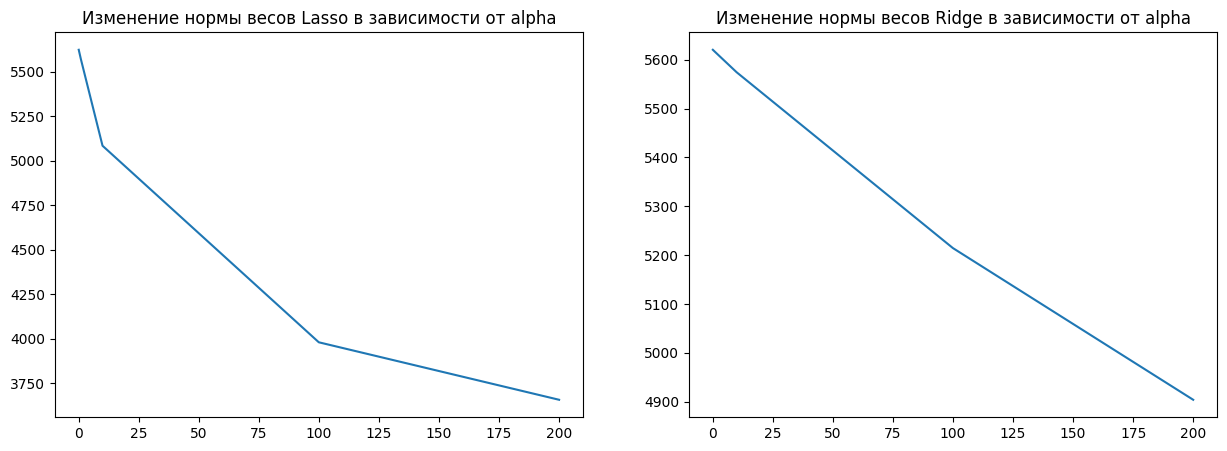

In [43]:
fig, ax = plt.subplots(1, 2, figsize=(15, 5))

ax[0].set_title("Изменение нормы весов Lasso в зависимости от alpha")
ax[0].plot(alpha_list, lasso_weights);

ax[1].set_title("Изменение нормы весов Ridge в зависимости от alpha")
ax[1].plot(alpha_list, ridge_weights);

Более агрессивно убирает веса метод Lasso. Lasso-регрессию часто используют для отбора признаков, потому что она перед неважными признаками ставит нулевые коэффициенты

**Задача 3.11 (0.5 балла)**
В зависимости от значения параметра $\alpha$ в Lasso-регрессии зануляются разные оценки коэффициентов. Оптимальное значение $\alpha$ можно подобрать, например, при помощи кросс-валидации по тренировочной выборке.

Для проведения кросс-валидации можно использовать модуль `LassoCV`. Этот модуль принимает список значений $\alpha$ (параметр `alphas`) и при обучении проводит кросс-валидацию для каждого значения из этого списка, сохраняя MSE на каждом участке кросс-валидации (количество участков – параметр `cv`) в матрицу ошибок (то есть итоговая матрица будет иметь размер `len(alphas)` $\times$ `cv`). После обучения модели матрицу ошибок можно получить, обратившись к атрибуту `.mse_path_`.

Заметим, что модель может использовать $\alpha$ не в том порядке, в котором вы подаёте их в функцию: для определения порядка используйте атрибут `.alphas_` Установите количество участков для кросс-валидации (параметр `cv`) равным 5.

Усредните ошибки для каждого значения $\alpha$ (то есть по строкам матрицы ошибок) и выберите то значение, которое даёт наибольшее качество.

In [44]:
from sklearn.linear_model import LassoCV

In [45]:
lasso = LassoCV(
    alphas = np.arange(0,200, 0.2),
    cv=5
)

lasso.fit(X_train_scaled, y_train)

LassoCV(alphas=array([  0. ,   0.2,   0.4,   0.6,   0.8,   1. ,   1.2,   1.4,   1.6,
         1.8,   2. ,   2.2,   2.4,   2.6,   2.8,   3. ,   3.2,   3.4,
         3.6,   3.8,   4. ,   4.2,   4.4,   4.6,   4.8,   5. ,   5.2,
         5.4,   5.6,   5.8,   6. ,   6.2,   6.4,   6.6,   6.8,   7. ,
         7.2,   7.4,   7.6,   7.8,   8. ,   8.2,   8.4,   8.6,   8.8,
         9. ,   9.2,   9.4,   9.6,   9.8,  10. ,  10.2,  10.4,  10.6,
        10.8,  11. ,  11.2,  11.4,  11.6,  11.8,  12. ,  12.2,  12.4,
        12.6,  12.8,  13. ,  13.2,  13.4,  13.6,  13.8,  14. ,  14.2,
        14.4,  14.6,  14.8,  15. ,  15.2,  15.4,  15.6...
       187.2, 187.4, 187.6, 187.8, 188. , 188.2, 188.4, 188.6, 188.8,
       189. , 189.2, 189.4, 189.6, 189.8, 190. , 190.2, 190.4, 190.6,
       190.8, 191. , 191.2, 191.4, 191.6, 191.8, 192. , 192.2, 192.4,
       192.6, 192.8, 193. , 193.2, 193.4, 193.6, 193.8, 194. , 194.2,
       194.4, 194.6, 194.8, 195. , 195.2, 195.4, 195.6, 195.8, 196. ,
       196.2, 196.4, 196.6, 196.8, 197. , 197.2, 197.4, 197.6, 197.8,
       198. , 198.2, 198.4, 198.6, 198.8, 199. , 199.2, 199.4, 199.6,
       199.8]),
        cv=5)

In [46]:
best_alpha = lasso.alphas_[np.argmin(np.mean(lasso.mse_path_, axis=1))]
best_alpha

1.2000000000000002

**Задача 3.12 (0.5 балла)** Обучите итоговую Lasso-регрессию с выбранным параметром $\alpha$ на тренировочной выборке. Выведите полученные коэффициенты и прокомментируйте, какие признаки оказались неинформативными, а какие – наиболее информативными. Приведите возможное смысловое объяснение этого результата.

In [47]:
lasso = Lasso(alpha=best_alpha).fit(X_train_scaled, y_train)
lasso.coef_

array([ 5340.6549197 ,   -92.53268322,   -67.20563735, -1114.76401479,
          -0.        ,   -26.62680817,  -129.20527344,   -51.13911625,
          30.87347452,     0.        ,   -15.27494453,   160.87904459,
         105.32904875,    77.72580852,    -0.        ,  -179.41991274,
        -293.20564579,  -425.57868799,  -488.64265477,   186.01070123,
        -259.18912364,  -587.49765795,   115.13023118,    -0.        ,
         188.75083334,   196.2774716 ])

In [48]:
# данные, которые неинформативны
data.drop("price", axis=1).iloc[:,abs(lasso.coef_)<=15].columns

Index(['y', 'cut_Premium', 'color_G', 'clarity_VS2'], dtype='object')

Думаю, что эти признаки не особо важные потому, что эти признаки могут быть и у дешевых алмазов, а значит они не являются определяющими

In [49]:
#самые информативные данные
data.drop("price", axis=1).iloc[:,np.argsort(abs(lasso.coef_))[::-1][:5]].columns

Index(['carat', 'x', 'clarity_SI2', 'clarity_I1', 'color_J'], dtype='object')

Карат - определяющий признак, потому что в большинстве своем именно от веса зависит стоимость алмазов, остальные признаки могут являться признаками именно дорогих алмазов

**Задача 3.13 (0.4 балла)** Сделайте предсказания обученной Lasso-регрессии на тестовой выборке и сравните среднеквадратичную ошибку с ошибкой обычной линейной регрессии из задачи 3.7. Какую модель лучше использовать для предсказаний? Приведите возможное объяснение, почему одна модель оказалась лучше другой.

In [50]:
print(f"Lasso: {mean_squared_error(y_test, lasso.predict(X_test_scaled))}")
print(f"LinearRegression : {mean_squared_error(y_test, lr.predict(X_test_scaled))}")

Lasso: 1314673.3092176097
LinearRegression : 1315249.482453691


Лучше работает Lasso, потому что позволяет штрафовать за слишком большие веса и немного снизить переобучение модели.